### **다음 분기에 어떤 게임을 설계해야 할까**

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

*  지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
*   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
*  출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.




In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('vgames2.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# 데이터 전처리

In [4]:
df.info() #데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
#출고량 칼럼의 단위 통일

def pre_MK(x):
    if 'K' in x:
        x = x[:len(x)-1]
        x = float(x)*1000
    elif 'M' in x:
        x = x[:len(x)-1]
        x = float(x)*1000000
    else:
        x = float(x)*1000000
    return x

for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
  df[col] = df[col].apply(pre_MK)

In [6]:
df.drop_duplicates(inplace = True) #중복 데이터 삭제

In [7]:
df.isnull().sum() #결측치 확인

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
df = df.dropna(axis = 0) #결측치 제거

In [11]:
#csv 파일에서 year 이상치 확인

print('세자리 수 Year 데이터의 개수는 : ', len(df[df['Year'].apply(lambda x : len(str(int(x))) == 3)]))
print('두자리 수 Year 데이터의 개수는 : ', len(df[df['Year'].apply(lambda x : len(str(int(x))) == 2)]))
print('한자리 수 Year 데이터의 개수는 : ', len(df[df['Year'].apply(lambda x : len(str(int(x))) == 1)]))

세자리 수 Year 데이터의 개수는 :  0
두자리 수 Year 데이터의 개수는 :  47
한자리 수 Year 데이터의 개수는 :  53


In [12]:
# year 이상치 처리 함수 생성 
def pre_year(x):
    if len(str(int(x))) == 1:
        x = x+2000
    elif len(str(int(x))) == 2:
        if int(x) <= 22:
            x = x+2000
        else:
            x = x+1900
    return x

In [13]:
#함수 적용
df['Year'] = df['Year'].apply(pre_year)

In [16]:
df['Year'] = df['Year'].astype('int') # Year : float to int

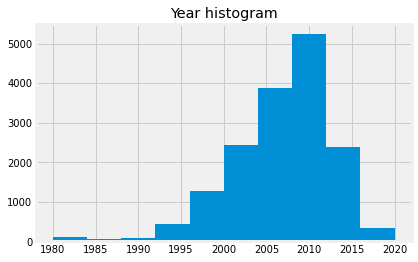

In [15]:
#year 분포 : 이상치 처리 확인
plt.hist(df['Year'])
plt.title('Year histogram')
plt.show()

In [17]:
df.shape

(16241, 9)

In [18]:
#Feature Engineering
df['total'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] 

# 분석 및 결과

In [22]:
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#지역에 따라서 선호하는 게임 장르가 다를까?

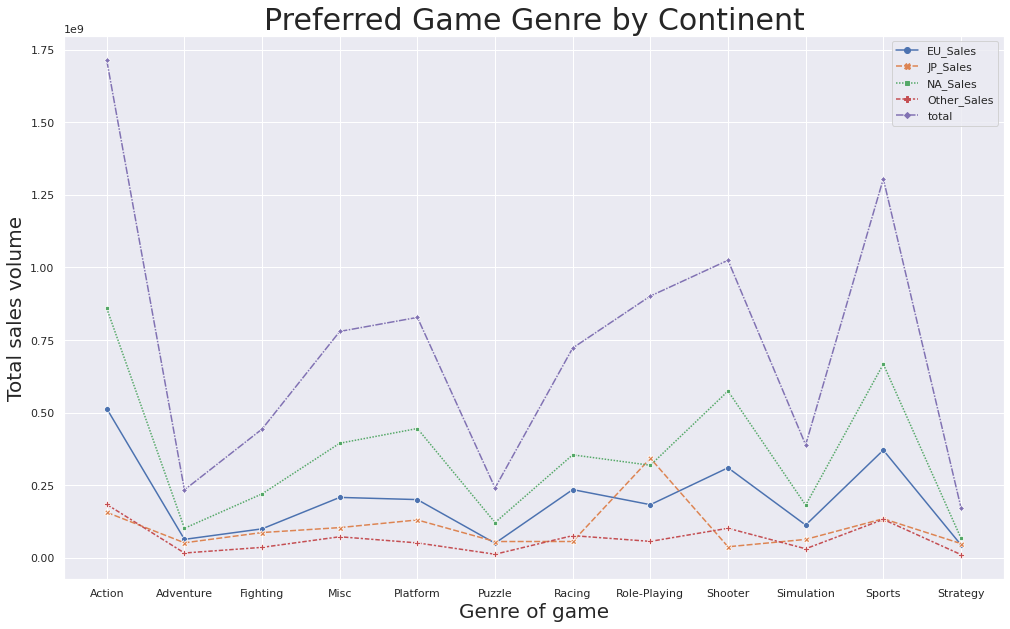

In [24]:
df_genre = df.groupby(by=['Genre'])['total'].sum() # 전 지역 선호하는 게임 장르
df_genre = df_genre.reset_index()

df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum() # 북미 선호하는 게임 장르
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽 선호하는 게임 장르
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_ot = df_genre_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")

sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Preferred Game Genre by Continent", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

sns.lineplot(data=df_genre, markers=True);

In [25]:
#H0 : 지역에 따라 선호하는 게임 장르에 평균적인 차이가 없다.
#H1 : 지역에 따라 선호하는 게임 장르에 평균적인 차이가 없다.

F_statistic, pvalue = stats.f_oneway(df_genre.NA_Sales, df_genre.EU_Sales, df_genre.JP_Sales, df_genre.Other_Sales)

print('F = {0:.2f}, pvalue = {1:.2f}'.format(F_statistic, pvalue))

#p-value < 0.05 로 귀무가설이 기각되며 지역에 따라 선호하는 게임장르에 차이가 있다.

F = 9.05, pvalue = 0.00


In [ ]:
#연도별 게임의 트렌드

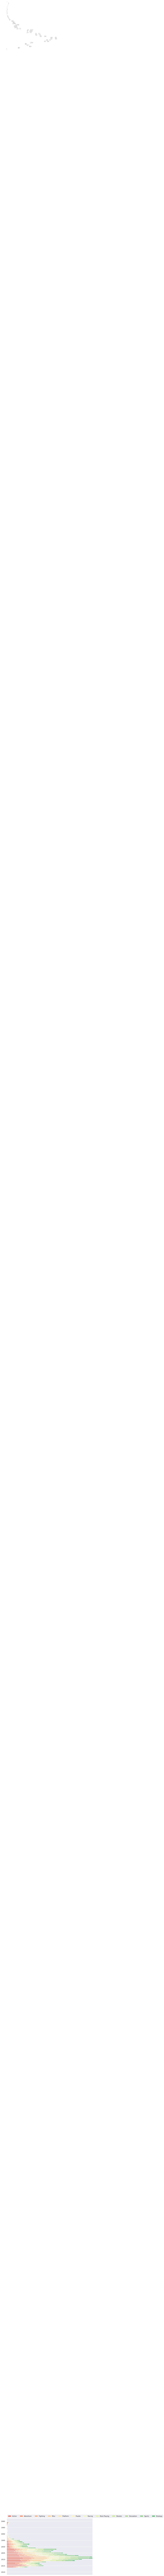

In [26]:
#연도에 따른 장르별 트렌드 : bar plot
df_cross = pd.crosstab(df.Year, df.Genre)
df_cross.head()

category_names = df_cross.columns
category_names

results = df_cross.T.to_dict('list')
results

def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 7))
    ax.invert_yaxis()    
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(results, category_names)
plt.show()

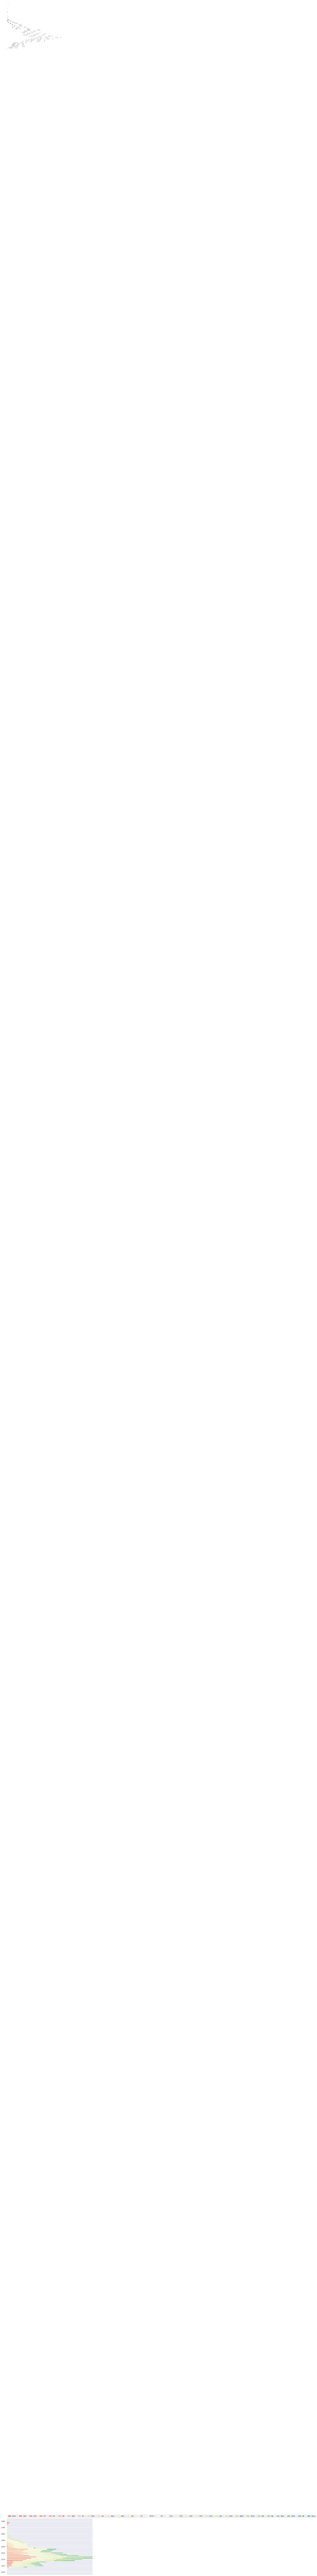

In [27]:
#연도에 따른 플랫폼별 트렌드 : bar plot
df_cross_pl = pd.crosstab(df.Year, df.Platform)
df_cross_pl.head()

category_names = df_cross_pl.columns
category_names

results = df_cross_pl.T.to_dict('list')
results

def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 7))
    ax.invert_yaxis()    
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(results, category_names)
plt.show()

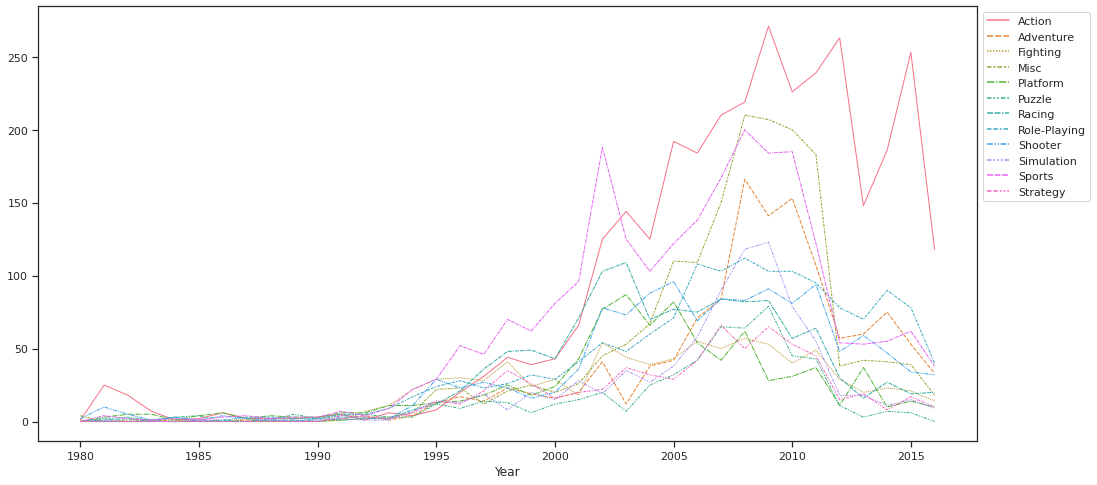

In [ ]:
#연도에 따른 장르별 트렌드 : line plot
df_ge_cross = pd.crosstab(df.Year, df.Genre)
df_ge_cross = df_ge_cross.drop([2017, 2020], axis = 0) #2017, 2020 데이터의 경우 데이터 수가 작아 삭제

sns.set_style('ticks')

plt.figure(figsize = (15,8))
sns.lineplot(data = df_ge_cross, linewidth = 1)
plt.legend(bbox_to_anchor = (1,1))

In [ ]:
pv_chi_ge = stats.chi2_contingency(df_ge_cross, correction = False)[1]

if pv_chi_ge >= 0.05:
    print('Year와 Genre 사이의 연관성이 존재하지 않는다.')
else:
    print('Year와 Genre 사이의 연관성이 존재한다.')

Year와 Genre 사이의 연관성이 존재한다.


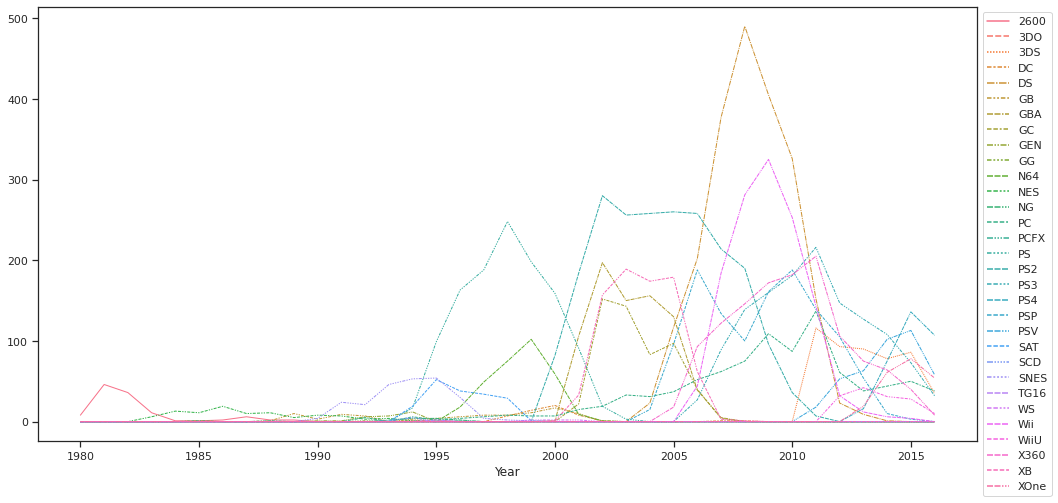

In [ ]:
#연도에 따른 플랫폼별 트렌드 : line plot

df_pl_cross = pd.crosstab(df.Year, df.Platform)
df_pl_cross = df_pl_cross.drop([2017, 2020], axis = 0)

plt.figure(figsize = (15,8))
sns.lineplot(data = df_pl_cross, linewidth = 1)
plt.legend(bbox_to_anchor = (1,1))

In [ ]:
pv_chi_pl = stats.chi2_contingency(df_pl_cross, correction = False)[1]

if pv_chi_pl >= 0.05:
    print('Year와 Platform 사이의 연관성이 존재하지 않는다.')
else:
    print('Year와 Platform 사이의 연관성이 존재한다.')

Year와 Platform 사이의 연관성이 존재한다.


In [ ]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
#total 출고량 top 100 추출
df_top100 = df.sort_values(by='total', ascending=False).head(100) 
df_top100.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
2908,Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0


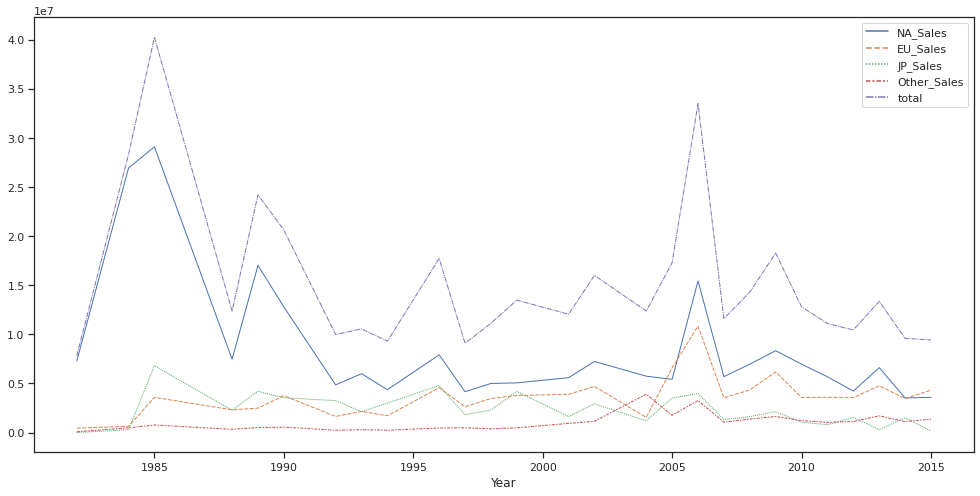

In [ ]:
year = df_top100.groupby('Year').mean()

plt.figure(figsize = (15,8))
sns.lineplot(data = year, linewidth = 1)
plt.legend(bbox_to_anchor = (1,1))

In [ ]:
group_ge = df_top100.groupby(df_top100['Genre'])
ge = group_ge.size()
ge = ge.sort_values(ascending = False)

<function matplotlib.pyplot.show>

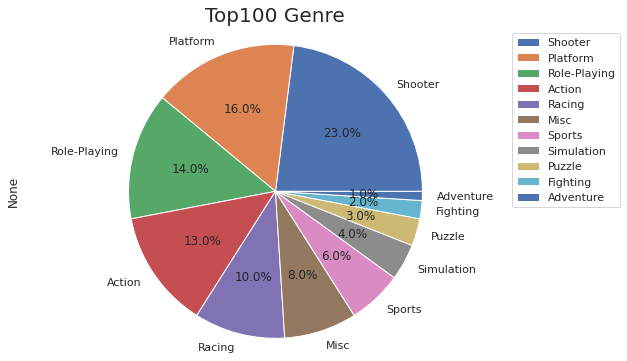

In [ ]:
ge.plot(kind = 'pie', figsize = (8,6), autopct = '%1.1f%%')
plt.title('Top100 Genre', size = 20)

plt.axis('equal')
plt.legend(ge.index, loc = 'best')
plt.legend(bbox_to_anchor = (1.2,1))
plt.show

In [ ]:
group_pl = df_top100.groupby(df_top100['Platform'])
pl = group_pl.size()
pl = pl.sort_values(ascending = False)

<function matplotlib.pyplot.show>

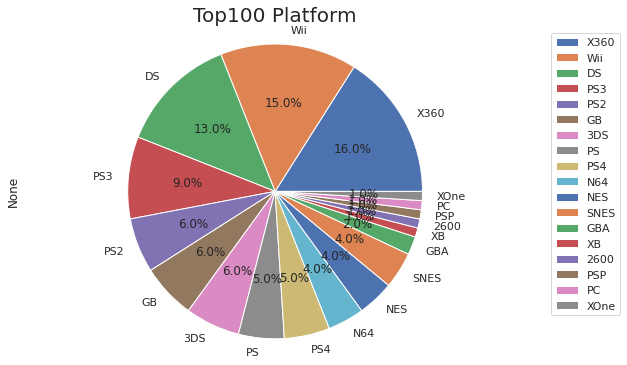

In [ ]:
pl.plot(kind = 'pie', figsize = (8,6), autopct = '%1.1f%%')
plt.title('Top100 Platform', size = 20)

plt.axis('equal')
plt.legend(pl.index, loc = 'best')
plt.legend(bbox_to_anchor = (1.2,1))
plt.show

In [ ]:
con = (df.Year >= 2000)
df_2000 = df[con]

In [ ]:
df_2000_top = df_2000.sort_values(by='total', ascending=False).head(100) 

<function matplotlib.pyplot.show>

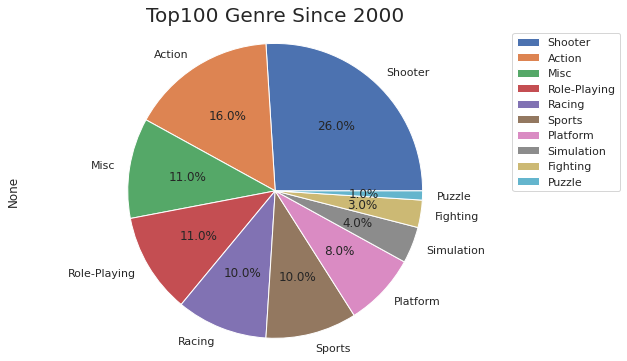

In [ ]:
group_ge_20 = df_2000_top.groupby(df_2000_top['Genre'])
ge_20 = group_ge_20.size()
ge_20 = ge_20.sort_values(ascending = False)

ge_20.plot(kind = 'pie', figsize = (8,6), autopct = '%1.1f%%')
plt.title('Top100 Genre Since 2000', size = 20)

plt.axis('equal')
plt.legend(pl.index, loc = 'best')
plt.legend(bbox_to_anchor = (1.2,1))
plt.show

In [ ]:
ge_20_mean

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,5.028125e+06,3.794375e+06,5.506250e+05,2.081250e+06
Fighting,4.800000e+06,1.666667e+06,2.156667e+06,5.566667e+05
Misc,6.255455e+06,4.042727e+06,1.138182e+06,1.139091e+06
Platform,6.583750e+06,4.140000e+06,2.532500e+06,1.177500e+06
Puzzle,3.440000e+06,5.360000e+06,5.320000e+06,1.180000e+06
Racing,5.645000e+06,4.403000e+06,1.667000e+06,1.972000e+06
Role-Playing,4.119091e+06,2.922727e+06,2.950000e+06,7.272727e+05
Shooter,5.593077e+06,3.189615e+06,1.907692e+05,1.121538e+06
Simulation,3.652500e+06,5.815000e+06,2.905000e+06,1.187500e+06


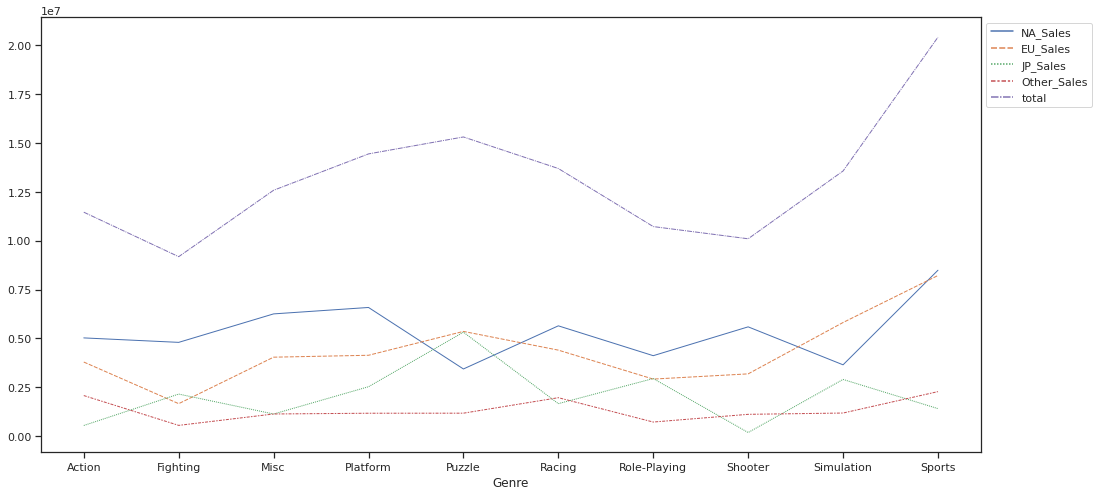

In [ ]:
ge_20_mean = group_ge_20.mean()
ge_20_mean.drop(['Year'], axis=1, inplace = True)

plt.figure(figsize = (15,8))
sns.lineplot(data = ge_20_mean, linewidth = 1)
plt.legend(bbox_to_anchor = (1,1))

<function matplotlib.pyplot.show>

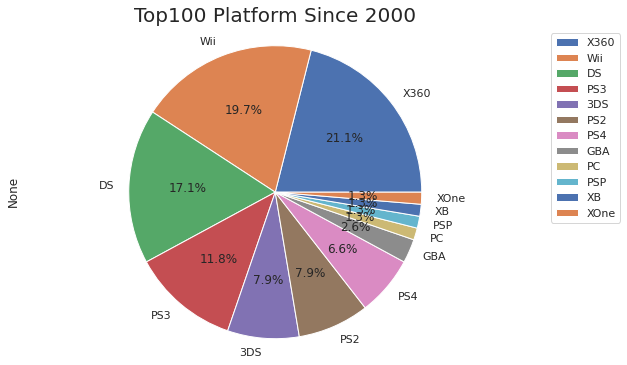

In [ ]:
group_pl_20 = df_2000_top.groupby(df_top100['Platform'])
pl_20 = group_pl_20.size()
pl_20 = pl_20.sort_values(ascending = False)

pl_20.plot(kind = 'pie', figsize = (8,6), autopct = '%1.1f%%')
plt.title('Top100 Platform Since 2000', size = 20)

plt.axis('equal')
plt.legend(pl.index, loc = 'best')
plt.legend(bbox_to_anchor = (1.2,1))
plt.show

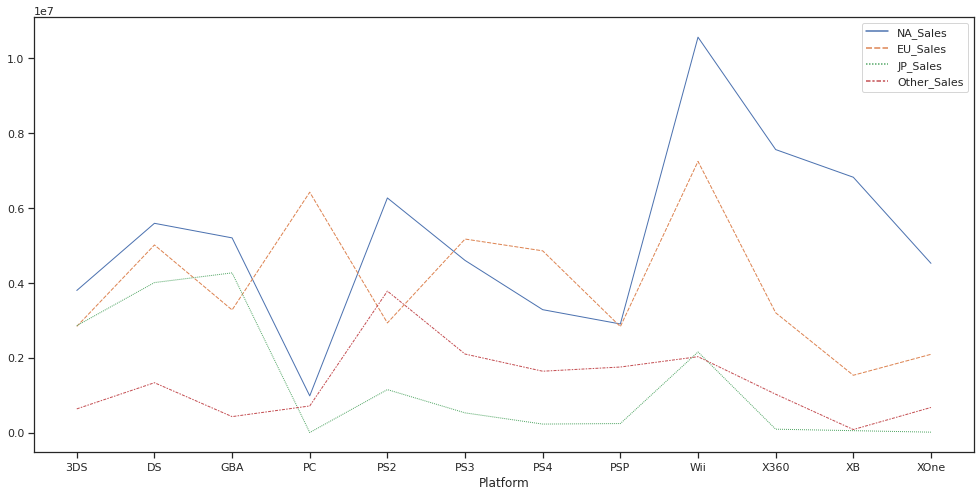

In [ ]:
pl_20_mean = group_pl_20.mean()
pl_20_mean.drop(['Year', 'total'], axis=1, inplace = True)

plt.figure(figsize = (15,8))
sns.lineplot(data = pl_20_mean, linewidth = 1)
plt.legend(bbox_to_anchor = (1,1))

In [ ]:
#X360이 shooter를 가장 잘 지원하는 platform일까?

X360 = df_2000_top[df_2000_top['Platform']=='X360']

X360['Genre'].value_counts()

Shooter         12
Misc             2
Action           2
Role-Playing     1
Name: Genre, dtype: int64

In [ ]:
X360.groupby('Genre')['total'].sum().sort_values(ascending=False)

Genre
Shooter         129450000.0
Misc             31020000.0
Action           27410000.0
Role-Playing      8840000.0
Name: total, dtype: float64

In [ ]:
shoot_pl = pd.DataFrame(df_2000_top[df_2000_top['Genre'] == 'Shooter'].groupby('Platform')['total'].sum().sort_values(ascending=False))
shoot_pl.reset_index(inplace = True)

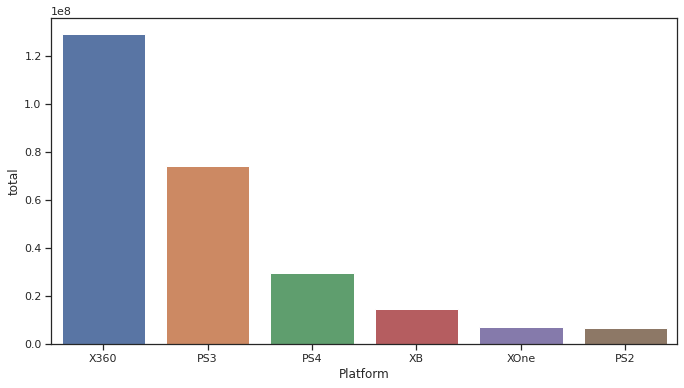

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(
    x='Platform',
    y='total',
    data=shoot_pl
);

In [ ]:
#두 변수간의 연관성

cross_chi2  = df_2000_top[['Genre', 'Platform','total']]

cross_chi2 = pd.crosstab(cross_chi2['Genre'], cross_chi2['Platform'])

p_value_chi2 = stats.chi2_contingency(cross_chi2, correction = False)[1]

p_value_chi2

#p-value가 0.05보다 크므로 두 변수간의 연관성은 존재하지 않는다.

1.0799315981990007e-06

In [ ]:
df_2000_top.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
2908,Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
3014,Wii Play,Wii,2006,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
